# **PyTorch and Autograd Demo**
### 18-461/661 S24 *Introduction to ML for Engineers* - CMU ECE

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader

# Typically we will still use numpy for basic math tasks that aren't immediately used in Pytorch
import numpy as np

import matplotlib.pyplot as plt

# Linear Regression

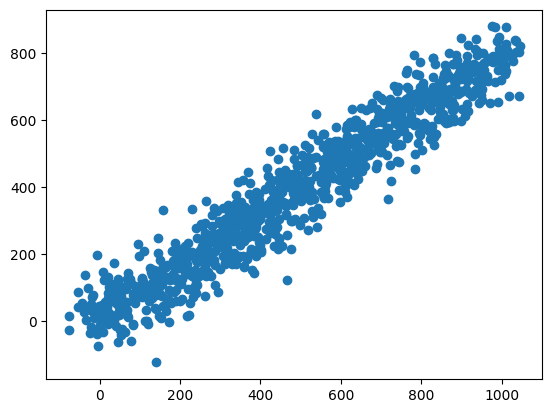

In [ ]:
# Function we want to find with linear regression
def f(x):
  return 0.8*x

D = 1000 #dataset size

x = np.arange(D, dtype=np.float32) + np.random.normal(0,50, D).astype('f')
x = x.reshape(-1, 1)
y = f(np.arange(D, dtype=np.float32)) + np.random.normal(0,50, D).astype('f')
y = y.reshape(-1, 1)
plt.scatter(x, y)
plt.show()

In [ ]:
# Define linear regression model class

class linear_regression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(linear_regression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [ ]:
# Instantiate hyperparameters
lr = 0.0000001 #learning rate
epochs = 1000 #how many times we pass through the dataset

# Instantiate model, loss function, and optimizers
model = linear_regression(1, 1) #since we only have 1 input and 1 output dimension
loss = torch.nn.MSELoss() #mean square loss
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
# Training loop
loss_hist = np.zeros(epochs)

for epoch in range(epochs):
    inputs = torch.from_numpy(x)
    target = torch.from_numpy(y)

    optimizer.zero_grad()
    # Before every forward prop and backprop cycle, we clear the computed values and gradients stored in the model.
    # We do this manually because in certain situations, we actually want the model to accumulate gradients.

    outputs = model(target) #forward propagation

    l = loss(outputs, labels)
    l.backward() #backpropagation

    optimizer.step() #update parameters

    loss_hist[epoch] = l.item()

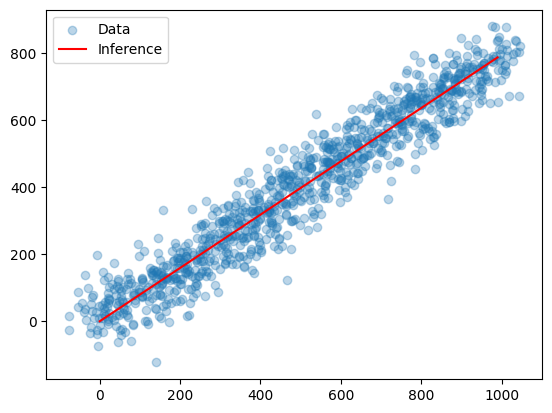

In [ ]:
# Inference
with torch.no_grad(): #turn off gradients
    pred_inputs = np.arange(0, D, 10, dtype=np.float32).reshape(-1, 1)
    pred = model(torch.from_numpy(pred_inputs)).data.numpy()

plt.clf()
plt.scatter(x, y, label='Data', alpha=0.3)
plt.plot(pred_inputs, pred, 'r-', label='Inference')
plt.legend(loc='best')
plt.show()

# Neural Network

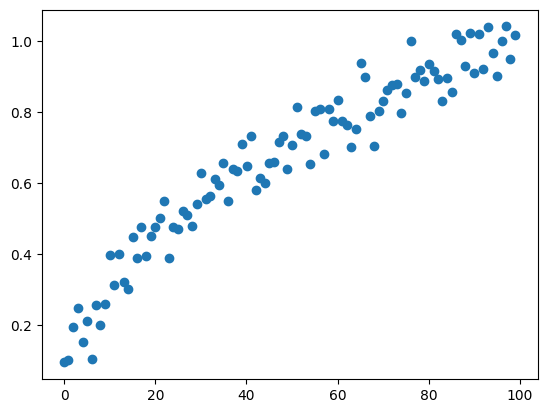

In [ ]:
def f(x):
  return np.sqrt(x/100)

D = 100 #dataset size

x = np.arange(D, dtype=np.float32) + np.random.normal(0,0.05,D).astype('f')
x = x.reshape(-1, 1)
y = f(np.arange(D, dtype=np.float32)) + np.random.normal(0,0.05,D).astype('f')
y = y.reshape(-1, 1)
plt.scatter(x, y)
plt.show()

In [ ]:
# Define linear regression model class

class neural_network(torch.nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dim=100):
        super(neural_network, self).__init__()
        self.seq = nn.Sequential(
            torch.nn.Linear(input_dim, hidden_dim),
            torch.nn.Sigmoid(),
            torch.nn.Linear(hidden_dim, output_dim)
        )

    def forward(self, x):
        out = self.seq(x)
        return out

# Instantiate hyperparameters
lr = 0.001 #learning rate
epochs = 10000 #how many times we pass through the dataset

# Instantiate model, loss function, and optimizers
model = neural_network(1, 1) #since we only have 1 input and 1 output dimension
loss = torch.nn.MSELoss() #mean square loss
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

In [ ]:
# Training loop
loss_hist = np.zeros(epochs)

for epoch in range(epochs):
    inputs = torch.from_numpy(x)
    target = torch.from_numpy(y)

    optimizer.zero_grad()
    # Before every forward prop and backprop cycle, we clear the computed values and gradients stored in the model.
    # We do this manually because in certain situations, we actually want the model to accumulate gradients.

    outputs = model(inputs) #forward propagation

    l = loss(outputs, target)
    l.backward() #backpropagation

    optimizer.step() #update parameters

    loss_hist[epoch] = l.item()

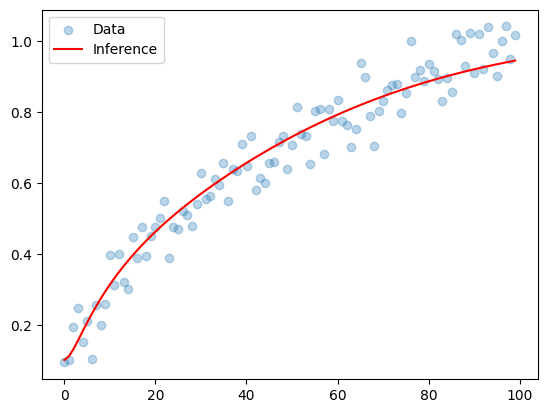

In [ ]:
# Inference
with torch.no_grad(): #turn off gradients
    pred_inputs = np.arange(0, D, 1, dtype=np.float32).reshape(-1, 1)
    pred = model(torch.from_numpy(pred_inputs)).data.numpy()

plt.clf()
plt.scatter(x, y, label='Data', alpha=0.3)
plt.plot(pred_inputs, pred, 'r-', label='Inference')
plt.legend(loc='best')
plt.show()

In the example below we implement MSE Loss manually by defining an autograd function.

In [ ]:
# Boilerplate taken from PyTorch Website (https://pytorch.org/tutorials/beginner/examples_autograd/two_layer_net_custom_function.html)
# Inherit from Function
class manual_mse_loss(torch.autograd.Function):

    # Note that forward, setup_context, and backward are @staticmethods
    @staticmethod
    def forward(ctx, pred, y):
        ctx.save_for_backward(pred, y)
        output = torch.sum((y - pred)**2)
        return output

    # This function has only a single output, so it gets only one gradient
    @staticmethod
    def backward(ctx, grad_output):
        # This is a pattern that is very convenient - at the top of backward
        # unpack saved_tensors and initialize all gradients w.r.t. inputs to
        # None. Thanks to the fact that additional trailing Nones are
        # ignored, the return statement is simple even when the function has
        # optional inputs.
        pred, y = ctx.saved_tensors
        grad_pred = None

        # These needs_input_grad checks are optional and there only to
        # improve efficiency. If you want to make your code simpler, you can
        # skip them. Returning gradients for inputs that don't require it is
        # not an error.
        grad_pred = 2*(pred - y)
        grad_y = 2*(y - pred)

        return grad_pred, grad_y

In [ ]:
loss = manual_mse_loss()
loss_func = loss.apply

#Training loop
for epoch in range(epochs):
    inputs = torch.from_numpy(x)
    target = torch.from_numpy(y)

    optimizer.zero_grad()
    # Before every forward prop and backprop cycle, we clear the computed values and gradients stored in the model.
    # We do this manually because in certain situations, we actually want the model to accumulate gradients.

    outputs = model(inputs) #forward propagation

    l = loss_func(outputs, target)
    l.backward() #backpropagation

    optimizer.step() #update parameters

    loss_hist[epoch] = l.item()

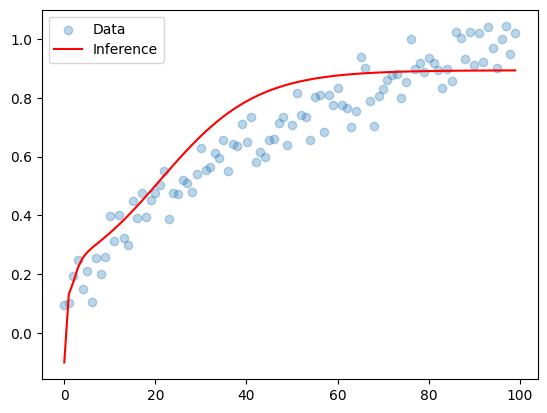

In [ ]:
# Inference
with torch.no_grad(): #turn off gradients
    pred_inputs = np.arange(0, D, dtype=np.float32).reshape(-1, 1)
    pred_manual = model(torch.from_numpy(pred_inputs)).data.numpy()

plt.clf()
plt.scatter(x, y, label='Data', alpha=0.3)
plt.plot(pred_inputs, pred, 'r-', label='Inference')
plt.legend(loc='best')
plt.show()

You can see that the quality isn't quite as good here; this is due to loss of precision by doing computation at the Python level, whereas PyTorch uses a lower-level implementation to compute MSE loss.

In the example below we implement MSE Loss by combining PyTorch operations.

In [ ]:
def mse_loss_2(pred, y):
    output = torch.sum((y - pred)**2)
    return output

In [ ]:
#Training loop
for epoch in range(epochs):
    inputs = torch.from_numpy(x)
    target = torch.from_numpy(y)

    optimizer.zero_grad()
    # Before every forward prop and backprop cycle, we clear the computed values and gradients stored in the model.
    # We do this manually because in certain situations, we actually want the model to accumulate gradients.

    outputs = model(inputs) #forward propagation

    l = mse_loss_2(outputs, target)
    l.backward() #backpropagation

    optimizer.step() #update parameters

    loss_hist[epoch] = l.item()

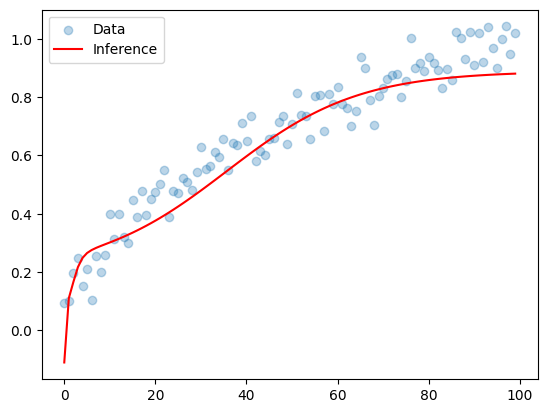

In [ ]:
# Inference
with torch.no_grad(): #turn off gradients
    pred_inputs = np.arange(0, D, dtype=np.float32).reshape(-1, 1)
    pred = model(torch.from_numpy(pred_inputs)).data.numpy()

plt.clf()
plt.scatter(x, y, label='Data', alpha=0.3)
plt.plot(pred_inputs, pred, 'r-', label='Inference')
plt.legend(loc='best')
plt.show()

Similarly, the precision is not as good due to the computation occurring at the Python level.